<a href="https://colab.research.google.com/github/aang13/Google_colab_projects/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise -Automated category classification of clothes images-

## Problem setting (Overview)
Assuming an EC site in the apparel industry.

For product management, category information is attached to the product, but the category information sent from the manufacturer and the category used by the company are different.

Currently, the person in charge assigns them to their own category by eye inspection, but due to the increase in the number of partner manufacturers and diversification of products, the time required for the categorization work has increased considerably.

As a business, a category is assigned by eye inspection for newly introduced product data, but if it is not clear at a glance, the past information is searched to determine the category. For this reason, man-hours have been spent.

Since there is teacher data (Fashion-Mnist) that has been categorized so far, can I use this to automate categorization?


## Advanced Setting
■ Sales are 50 million yen / month, an up-and-coming EC site

■ 4,000 new products are introduced every month

■ One person in charge is now doing this work.

■ The labor cost for one person in charge is 1 million yen / month

■ ** Simple items can be determined in 1 minute for each product ** and executed until finalization

However, in the case of ** difficult things **, refer to past products of the same brand,

** It takes ** 20 minutes ** per product to remember and search for similar products and determine the final category.



## Implementation content
Create automatic clothing image classification models using Fashion-Mnist data.

The model algorithm is free. You can use what you learned during MNIST, or you can search for and use a different algorithm such as Google search.

Create and publish a report (proposal) using the model results.


## contents of report
Please submit a report in the form proposed to the person in charge at the EC site management company (the person who ordered this project).

Please make and announce with PowerPoint.

Required contents are as follows. It is okay to include other points of view.

■ Definition of problem settings (interpretation)

■ About classification models (conditions, model types, verification methods, results, etc.)

■ Receiving classification model results and proposing new business using this (flow, UI)

■ Estimated effects when starting new business (cost, man-hour creation, business perspective, etc.)

https://www.tensorflow.org/tutorials/keras/classification

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 5s 1us/step


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_labels)

60000

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
len(test_labels)

10000

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=100)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 91us/sample - loss: 0.4989 - acc: 0.8238
Epoch 2/100
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3709 - acc: 0.8667
Epoch 3/100
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3353 - acc: 0.8767
Epoch 4/100
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3092 - acc: 0.8860
Epoch 5/100
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2927 - acc: 0.8921
Epoch 6/100
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2767 - acc: 0.8978
Epoch 7/100
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2656 - acc: 0.9005
Epoch 8/100
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2535 - acc: 0.9054
Epoch 9/100
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2442 - acc: 0.9083
Epoch 10/100
60000/60000 [========================

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.8045 - acc: 0.8859

Test accuracy: 0.8859


In [0]:
predictions = model.predict(test_images)

In [0]:
model.save('moinul_model.h5')

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
predictions[0]

array([6.8628932e-36, 5.5449171e-25, 9.1107219e-33, 0.0000000e+00,
       4.8595388e-31, 1.9202410e-11, 3.7595476e-38, 5.3849512e-09,
       6.7702455e-21, 1.0000000e+00], dtype=float32)

In [0]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

NameError: ignored

In [0]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [0]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [0]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [0]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [0]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.2385180e-03 0.0000000e+00 9.9676126e-01 1.9049407e-20 2.4543408e-07
  2.0620322e-23 1.0587004e-10 0.0000000e+00 1.4649982e-29 0.0000000e+00]]


In [0]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [0]:
np.argmax(predictions_single[0])

2

# New Section

In [0]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

class MiniVGGNet:
	@staticmethod
	def build(width, height, depth, classes):
		# initialize the model along with the input shape to be
		# "channels last" and the channels dimension itself
		model = Sequential()
		inputShape = (height, width, depth)
		chanDim = -1

		# if we are using "channels first", update the input shape
		# and channels dimension
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)
			chanDim = 1		# first CONV => RELU => CONV => RELU => POOL layer set
		model.add(Conv2D(32, (3, 3), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(32, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

		# second CONV => RELU => CONV => RELU => POOL layer set
		model.add(Conv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

		# first (and only) set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(512))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(Dropout(0.5))

		# softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		# return the constructed network architecture
		return model

Using TensorFlow backend.


In [0]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")

# import the necessary packages
#from pyimagesearch.minivggnet import MiniVGGNet
from sklearn.metrics import classification_report
from keras.optimizers import SGD
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras import backend as K
from imutils import build_montages
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

# initialize the number of epochs to train for, base learning rate,
# and batch size
NUM_EPOCHS = 25
INIT_LR = 1e-2
BS = 32

In [0]:
# grab the Fashion MNIST dataset (if this is your first time running
# this the dataset will be automatically downloaded)
print("[INFO] loading Fashion MNIST...")
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

# if we are using "channels first" ordering, then reshape the design
# matrix such that the matrix is:
# 	num_samples x depth x rows x columns
if K.image_data_format() == "channels_first":
	trainX = trainX.reshape((trainX.shape[0], 1, 28, 28))
	testX = testX.reshape((testX.shape[0], 1, 28, 28))
 
# otherwise, we are using "channels last" ordering, so the design
# matrix shape should be: num_samples x rows x columns x depth
else:
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))

[INFO] loading Fashion MNIST...
4423680/4422102 [==============================] - 2s 0us/step


In [0]:
# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

# one-hot encode the training and testing labels
trainY = np_utils.to_categorical(trainY, 10)
testY = np_utils.to_categorical(testY, 10)

# initialize the label names
labelNames = ["top", "trouser", "pullover", "dress", "coat",
	"sandal", "shirt", "sneaker", "bag", "ankle boot"]

In [0]:
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=INIT_LR, momentum=0.9, decay=INIT_LR / NUM_EPOCHS)
model = MiniVGGNet.build(width=28, height=28, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# train the network
print("[INFO] training model...")
H = model.fit(trainX, trainY,
	validation_data=(testX, testY),
	batch_size=BS, epochs=NUM_EPOCHS)

[INFO] compiling model...












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


[INFO] training model...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 37s 621us/step - loss: 0.5285 - acc: 0.8221 - val_loss: 0.3207 - val_acc: 0.8836
Epoch 2/25
60000/60000 [==============================] - 33s 545us/step - loss: 0.3402 - acc: 0.8796 - val_loss: 0.2958 - val_acc: 0.8916
Epoch 3/25
60000/60000 [==============================] - 32s 538us/step - loss: 0.2868 - acc: 0.8974 - val_loss: 0.2394 - val_acc: 0.9128
Epoch 4/25
60000/60000 [==============================] - 32s 534us/step - loss: 0.2627 - acc: 0.9048 - val_loss: 0.2423 - val_acc: 0.9092
Epoch 5/25
60000/60000 [==============================] - 32s 541us/step - loss: 0.2451 - acc: 0.9114 - val_loss: 0.23

In [0]:
print(keras.__version__)

2.2.4-tf


In [0]:

model.save('moinul_model.h5')

from keras.models import load_model
model_load = load_model('moinul_model.h5')
# make predictions on the test set
preds = model_load.predict(testX)

# show a nicely formatted classification report
print("[INFO] evaluating network...")
print(classification_report(testY.argmax(axis=1), preds.argmax(axis=1),
	target_names=labelNames))

# plot the training loss and accuracy
N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

[INFO] evaluating network...
              precision    recall  f1-score   support

         top       0.89      0.88      0.88      1000
     trouser       0.99      0.99      0.99      1000
    pullover       0.91      0.91      0.91      1000
       dress       0.92      0.95      0.93      1000
        coat       0.90      0.91      0.90      1000
      sandal       0.99      0.98      0.99      1000
       shirt       0.81      0.79      0.80      1000
     sneaker       0.95      0.98      0.97      1000
         bag       0.99      0.99      0.99      1000
  ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



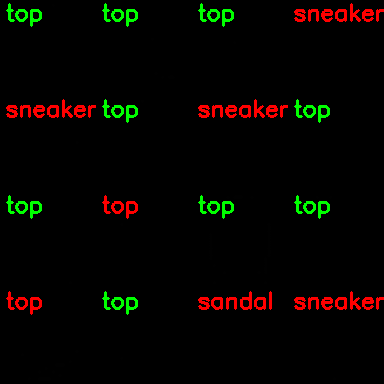

-1

In [0]:
# initialize our list of output images
import cv2
images = []

# randomly select a few testing fashion items
for i in np.random.choice(np.arange(0, len(testY)), size=(16,)):
	# classify the clothing
	probs = model.predict(testX[np.newaxis, i])
	prediction = probs.argmax(axis=1)
	label = labelNames[prediction[0]]
 
	# extract the image from the testData if using "channels_first"
	# ordering
	if K.image_data_format() == "channels_first":
		image = (testX[i][0] * 255).astype("uint8")
 
	# otherwise we are using "channels_last" ordering
	else:
		image = (testX[i] * 255).astype("uint8")
  
	# initialize the text label color as green (correct)
	color = (0, 255, 0)

	# otherwise, the class label prediction is incorrect
	if prediction[0] != np.argmax(testY[i]):
		color = (0, 0, 255)
 
	# merge the channels into one image and resize the image from
	# 28x28 to 96x96 so we can better see it and then draw the
	# predicted label on the image
	image = cv2.merge([image] * 3)
	image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
	cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75,
		color, 2)

	# add the image to our list of output images
	images.append(image)

# construct the montage for the images
montage = build_montages(images, (96, 96), (4, 4))[0]


from google.colab.patches import cv2_imshow
# show the output montage
cv2_imshow( montage)
cv2.waitKey(0)

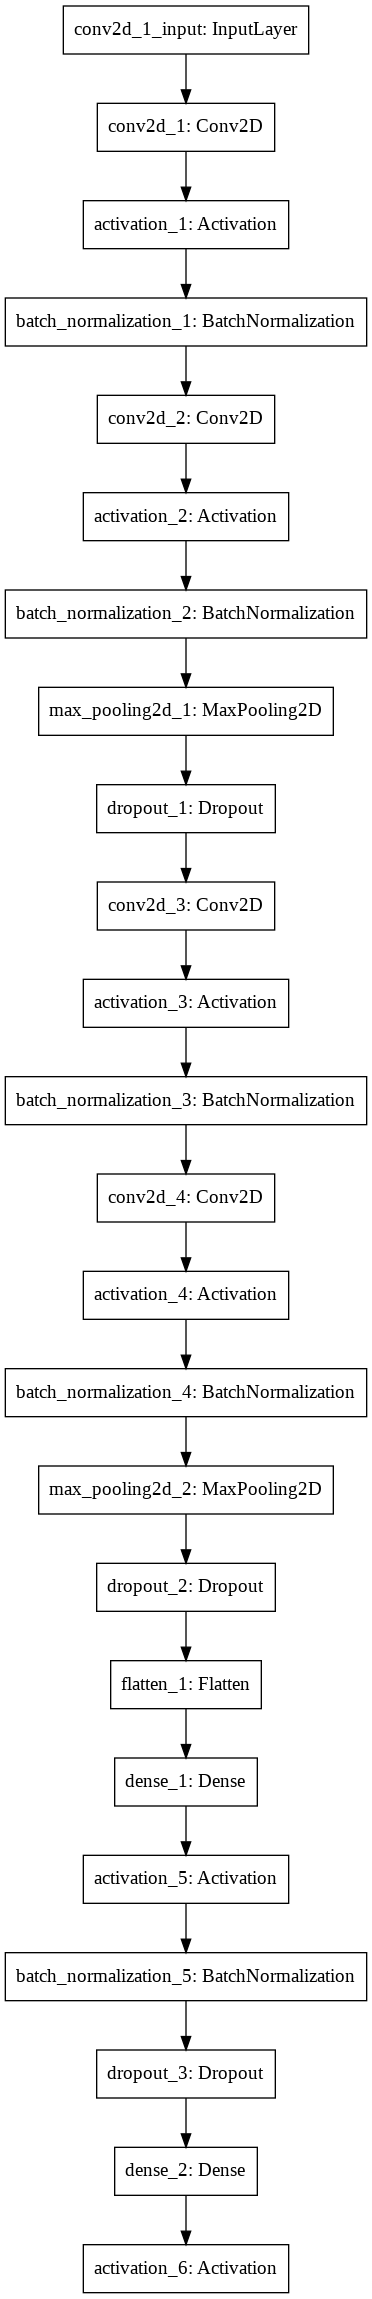

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [0]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
Y_prediction = model.predict(testX)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_prediction,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(testY,axis = 1) 
# compute the confusion matrix
confusion_mtx = np.array(confusion_matrix(Y_true, Y_pred_classes))

df_cm = pd.DataFrame(confusion_mtx, index = [i for i in labelNames ], 
                     columns = [x for x in labelNames])

plt.figure(figsize=(10,7))
plt.show()
pl = sns.heatmap(df_cm, annot=True)
tmp = pl.get_figure()
tmp.savefig("cm.png")


ValueError: ignored

In [0]:
print(confusion_mtx.dtype)

NameError: ignored